# **Exploratory data analysis**

In [3]:
# Import basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read data file
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4


In [ ]:
data.shape

(1200, 28)

In [ ]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [5]:
# check for missing values
data.isnull().sum().any()

False

In [ ]:
#drop EmpNumber
data=data.drop('EmpNumber',axis=1)

In [ ]:
# check for unique values
for x in data:
  print(x)
  print(data[x].unique())

Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFromHome
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
EmpEducationLev

In [ ]:
# print numerical columns
num_data=data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [ ]:
# Statistical analysis using describe function which gives us the count,mean standard deviation,minimum and maximum values.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [ ]:
#print categorical columns
cat_data=data.select_dtypes(include=['object'])
cat_data.columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [ ]:
cat_data.describe().T

,count,unique,top,freq
Gender,1200,2,Male,725
EducationBackground,1200,6,Life Sciences,492
MaritalStatus,1200,3,Married,548
EmpDepartment,1200,6,Sales,373
EmpJobRole,1200,19,Sales Executive,270
BusinessTravelFrequency,1200,3,Travel_Rarely,846
OverTime,1200,2,No,847
Attrition,1200,2,No,1022


In [ ]:
data.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


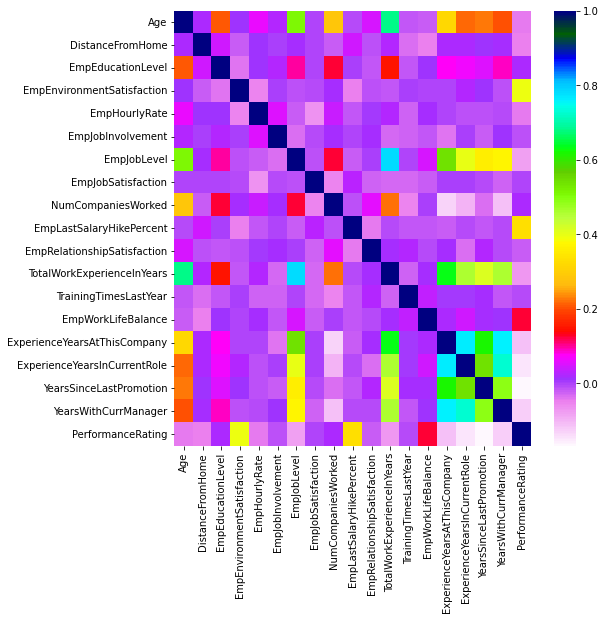

In [ ]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr ,cmap="gist_ncar_r",annot=False)

In [ ]:
F=data.corr()[['PerformanceRating']].sort_values(by='PerformanceRating',ascending=False)
F

,PerformanceRating
PerformanceRating,1.000000
EmpEnvironmentSatisfaction,0.395561
EmpLastSalaryHikePercent,0.333722
EmpWorkLifeBalance,0.124429
NumCompaniesWorked,0.020980
EmpEducationLevel,0.020529
EmpJobSatisfaction,0.000606
TrainingTimesLastYear,-0.005443
EmpJobInvolvement,-0.010539
EmpRelationshipSatisfaction,-0.019502


Text(0.5, 1.0, 'Features correlating with Performance Rating')

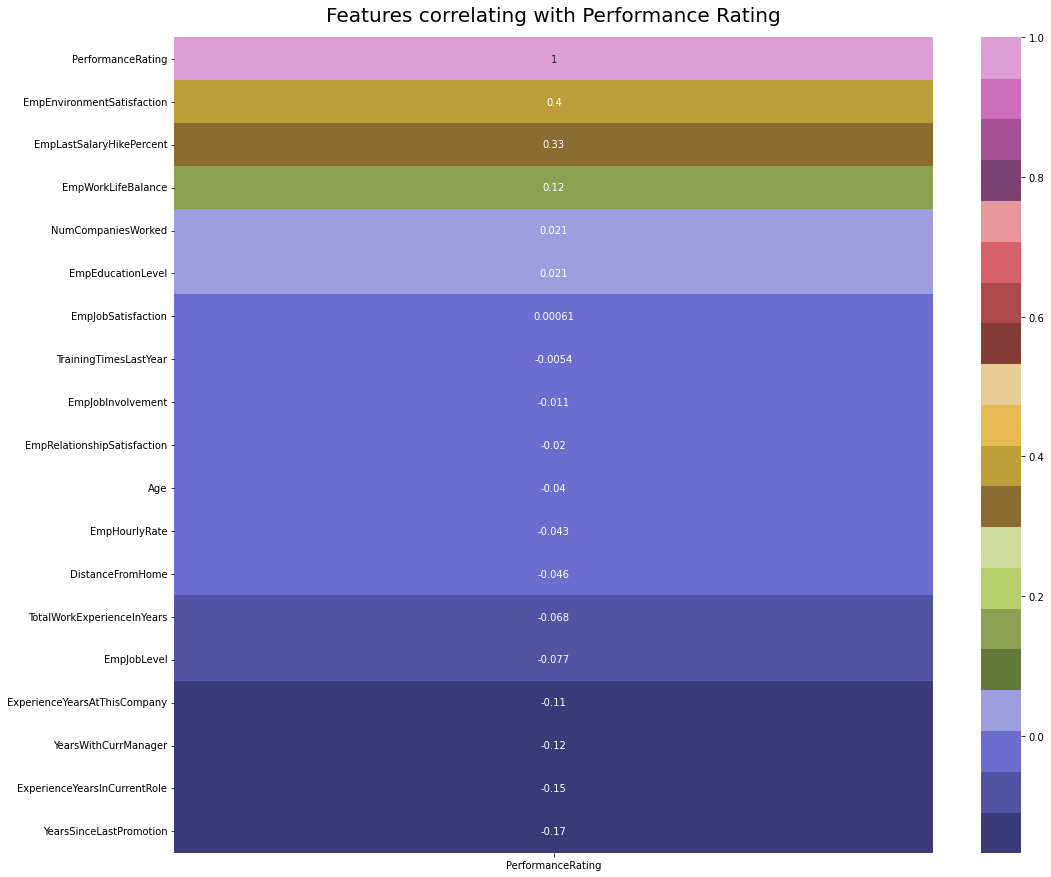

In [ ]:
plt.subplots(figsize=(17,15))
heatmap=sns.heatmap(data.corr()[['PerformanceRating']].sort_values(by='PerformanceRating',ascending=False),annot=True,cmap='tab20b')
heatmap.set_title('Features correlating with Performance Rating',fontdict={'fontsize':20},pad=16)

# Top 3 important factors effecting Employee Performance  rating based on Heat map.
As per the heatmap it can be determined that the below mentioned components in the given data significantly effects the employee performance rating.
* EmpEnvironmentSatisfaction
* EmpLastSalaryHikePercent
* EmpWorkLifeBalance

In [ ]:
x=num_data.drop('PerformanceRating',axis=1)
y=data[['PerformanceRating']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x,y)
importances=model.feature_importances_
fea_score=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)

In [ ]:
fea_score

EmpJobLevel                     0.017456
EmpJobSatisfaction              0.017738
EmpRelationshipSatisfaction     0.018158
EmpJobInvolvement               0.018487
EmpEducationLevel               0.020297
TrainingTimesLastYear           0.022502
NumCompaniesWorked              0.024780
EmpWorkLifeBalance              0.031898
YearsWithCurrManager            0.032684
TotalWorkExperienceInYears      0.034295
DistanceFromHome                0.036607
ExperienceYearsAtThisCompany    0.039837
Age                             0.041698
EmpHourlyRate                   0.049010
ExperienceYearsInCurrentRole    0.049243
YearsSinceLastPromotion         0.098599
EmpEnvironmentSatisfaction      0.210372
EmpLastSalaryHikePercent        0.236339
dtype: float64

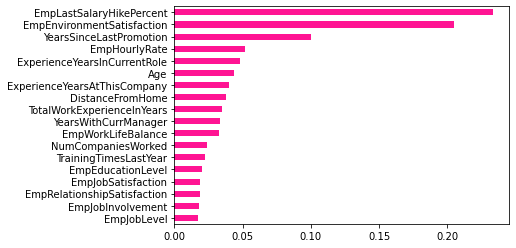

In [ ]:
fea_score.plot(kind='barh',color='deeppink')
plt.show()

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x,y)
importances=model.feature_importances_
fea_score=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)

In [ ]:
fea_score

NumCompaniesWorked              0.015713
EmpRelationshipSatisfaction     0.016598
EmpEducationLevel               0.017520
Age                             0.020145
EmpJobSatisfaction              0.021150
EmpJobLevel                     0.021844
EmpHourlyRate                   0.022205
EmpJobInvolvement               0.023239
TotalWorkExperienceInYears      0.023364
ExperienceYearsAtThisCompany    0.024888
TrainingTimesLastYear           0.024901
YearsWithCurrManager            0.025134
DistanceFromHome                0.032560
EmpWorkLifeBalance              0.043999
ExperienceYearsInCurrentRole    0.075606
YearsSinceLastPromotion         0.157196
EmpLastSalaryHikePercent        0.194371
EmpEnvironmentSatisfaction      0.239567
dtype: float32

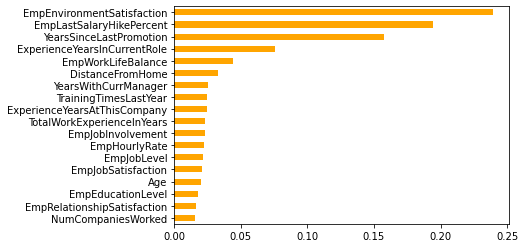

In [ ]:
fea_score.plot(kind='barh',color='orange')
plt.show()

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x,y)
importances=model.feature_importances_
fea_score=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)

In [ ]:
fea_score

EmpRelationshipSatisfaction     0.002205
EmpEducationLevel               0.003223
NumCompaniesWorked              0.003439
EmpJobInvolvement               0.004114
EmpJobLevel                     0.004524
TrainingTimesLastYear           0.008294
EmpJobSatisfaction              0.008809
TotalWorkExperienceInYears      0.009454
ExperienceYearsAtThisCompany    0.009934
DistanceFromHome                0.011253
YearsWithCurrManager            0.012444
Age                             0.013483
EmpHourlyRate                   0.013607
EmpWorkLifeBalance              0.057136
ExperienceYearsInCurrentRole    0.072899
YearsSinceLastPromotion         0.208656
EmpLastSalaryHikePercent        0.263608
EmpEnvironmentSatisfaction      0.292921
dtype: float64

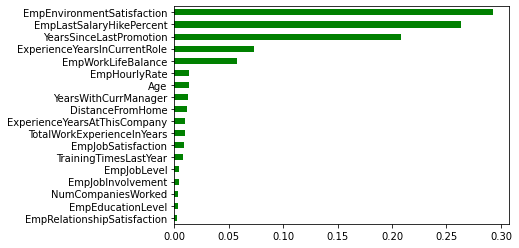

In [ ]:
fea_score.plot(kind='barh',color='green')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_fea=SelectKBest(score_func=chi2,k=12)
fit=best_fea.fit(x,y)

In [ ]:
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)

In [ ]:
fea_score=pd.concat([columns,scores],axis=1)
fea_score.columns=['features','scores']
print(fea_score.nlargest(18,'scores'))

                        features      scores
9       EmpLastSalaryHikePercent  297.136917
16       YearsSinceLastPromotion  238.004284
14  ExperienceYearsAtThisCompany  133.602068
15  ExperienceYearsInCurrentRole  120.860036
3     EmpEnvironmentSatisfaction  110.691319
17          YearsWithCurrManager   87.483471
11    TotalWorkExperienceInYears   41.593037
1               DistanceFromHome   18.650010
4                  EmpHourlyRate   17.869736
6                    EmpJobLevel    6.270263
0                            Age    5.170313
13            EmpWorkLifeBalance    3.876506
8             NumCompaniesWorked    1.208359
12         TrainingTimesLastYear    0.407106
10   EmpRelationshipSatisfaction    0.358014
2              EmpEducationLevel    0.314038
5              EmpJobInvolvement    0.222076
7             EmpJobSatisfaction    0.108310


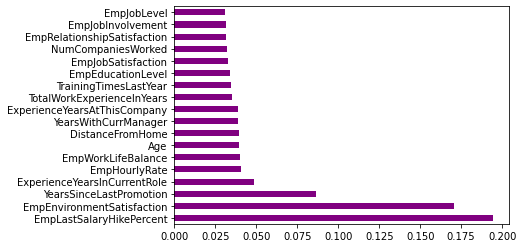

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
fea_imp=pd.Series(model.feature_importances_,index=x.columns)
fea_imp.nlargest(18).plot(kind='barh',color='purple')
plt.show()

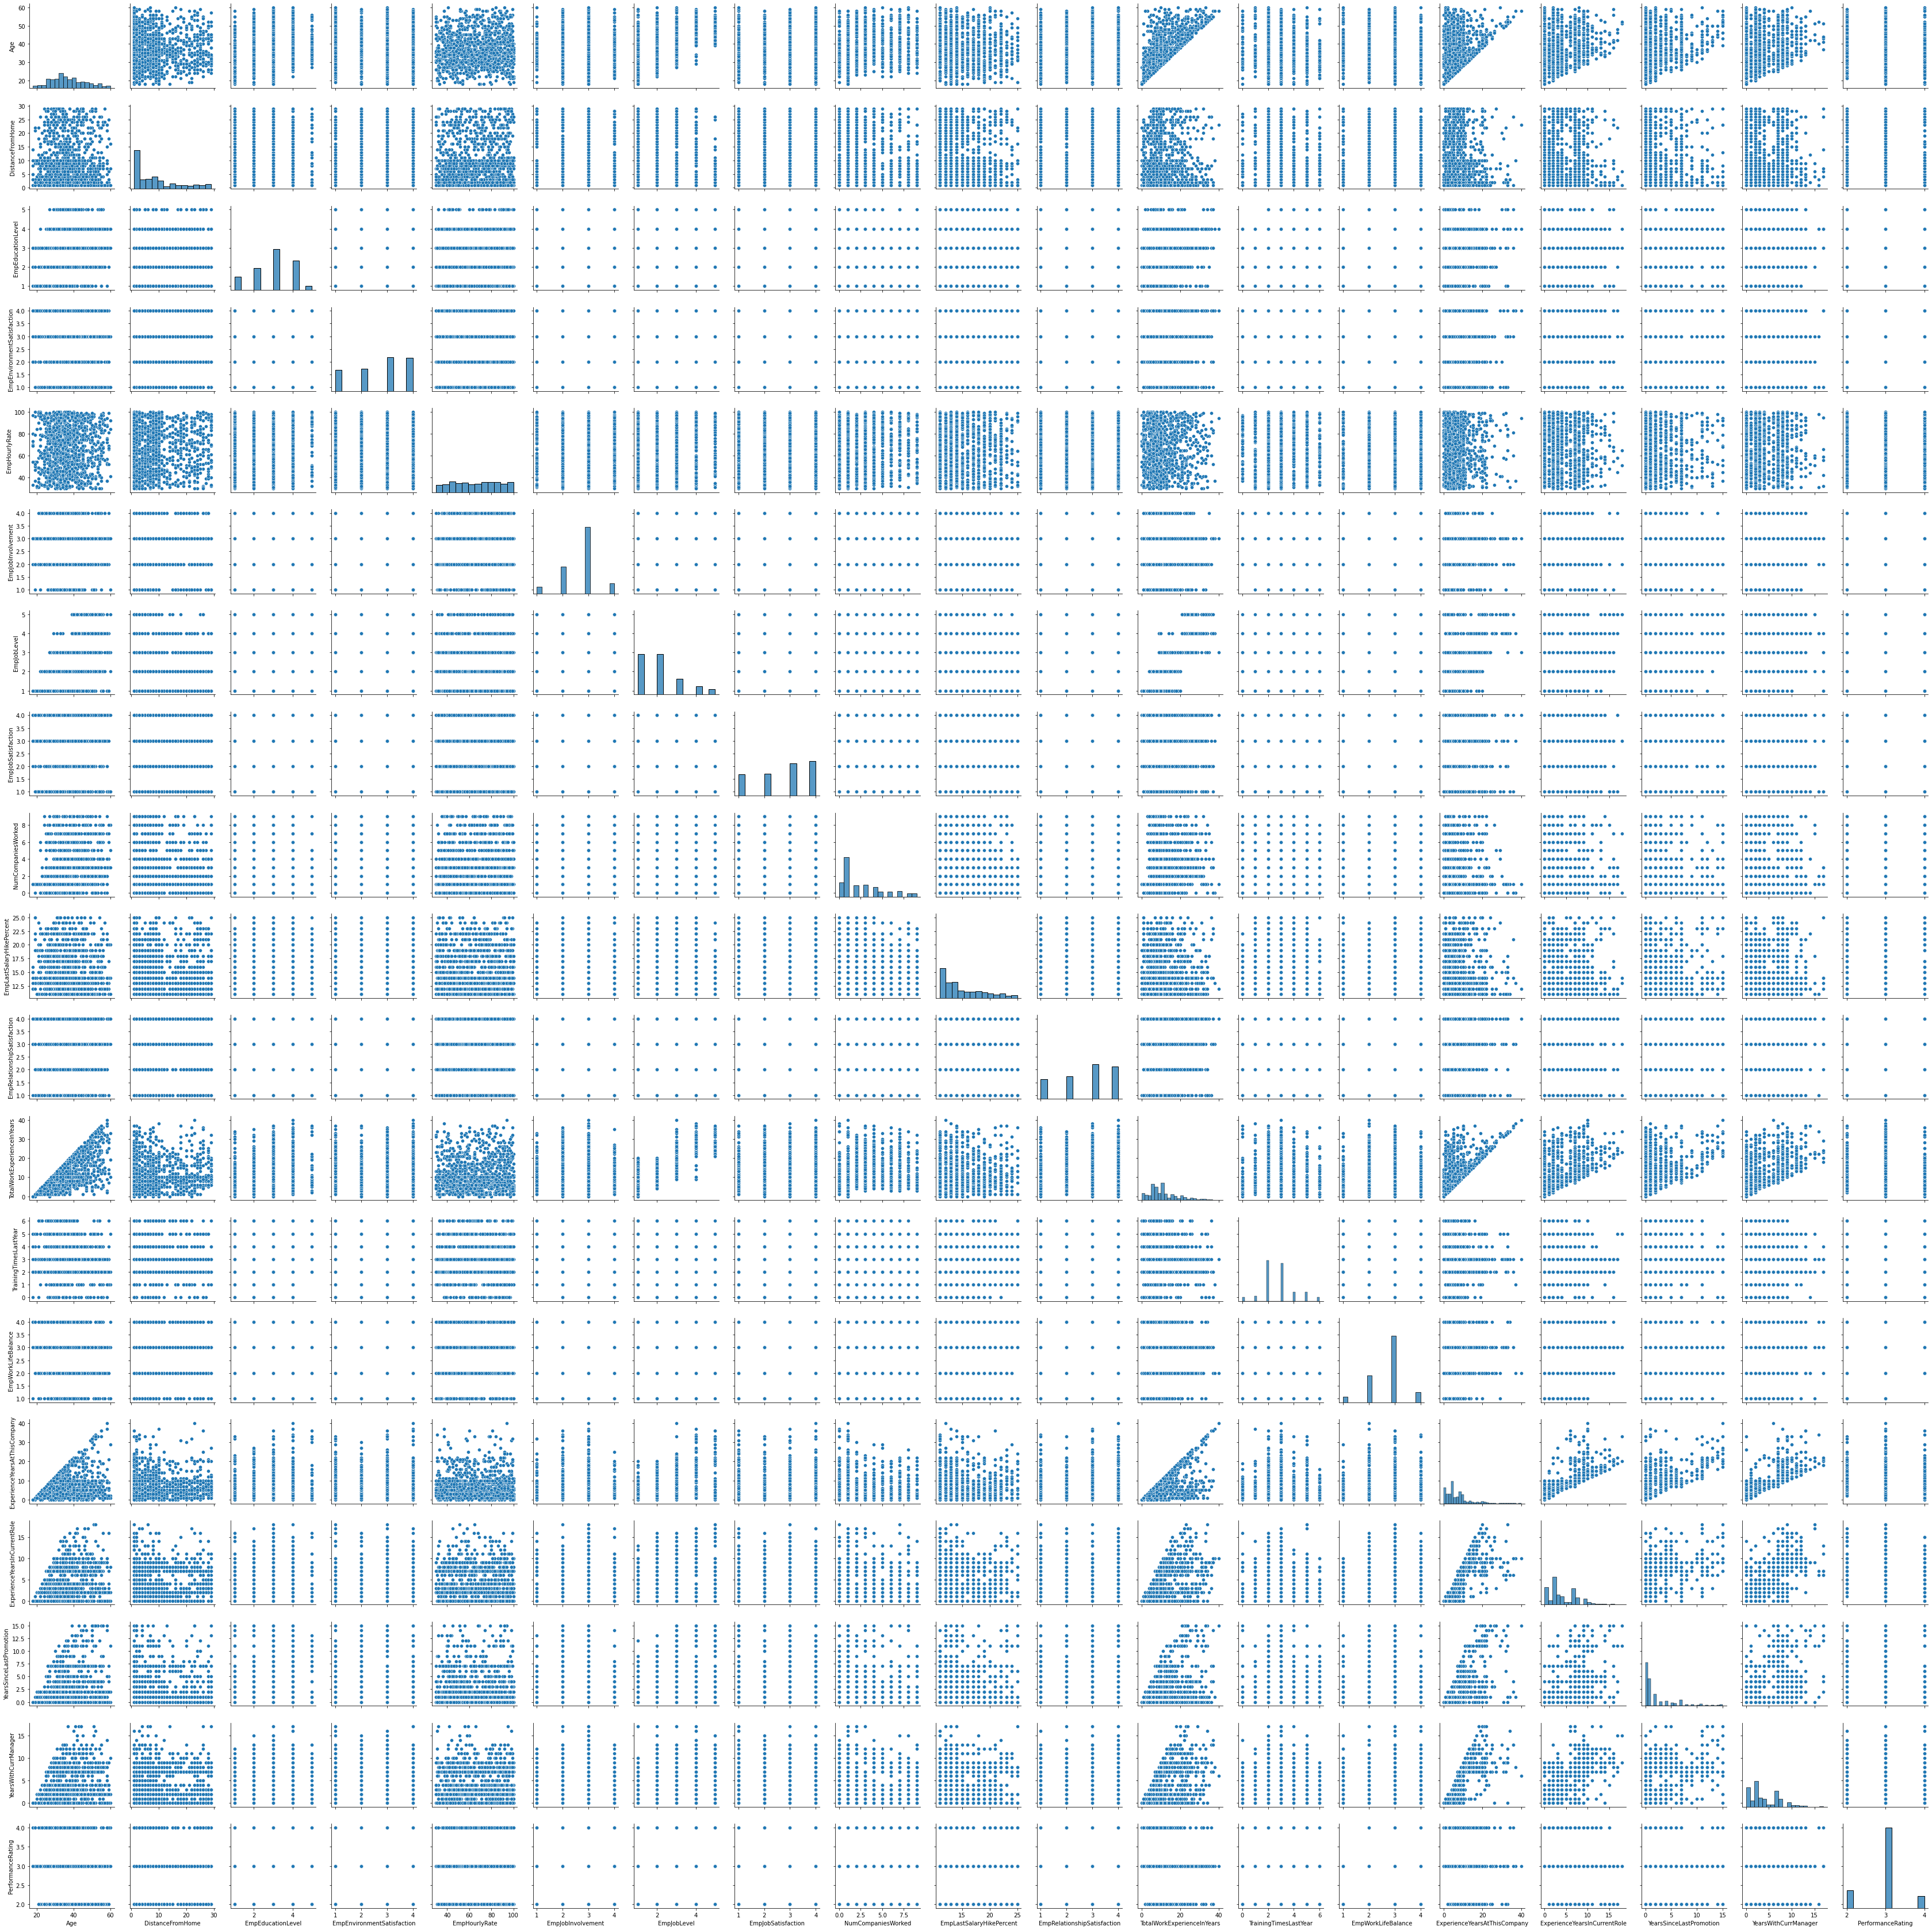

In [ ]:
sns.pairplot(data)

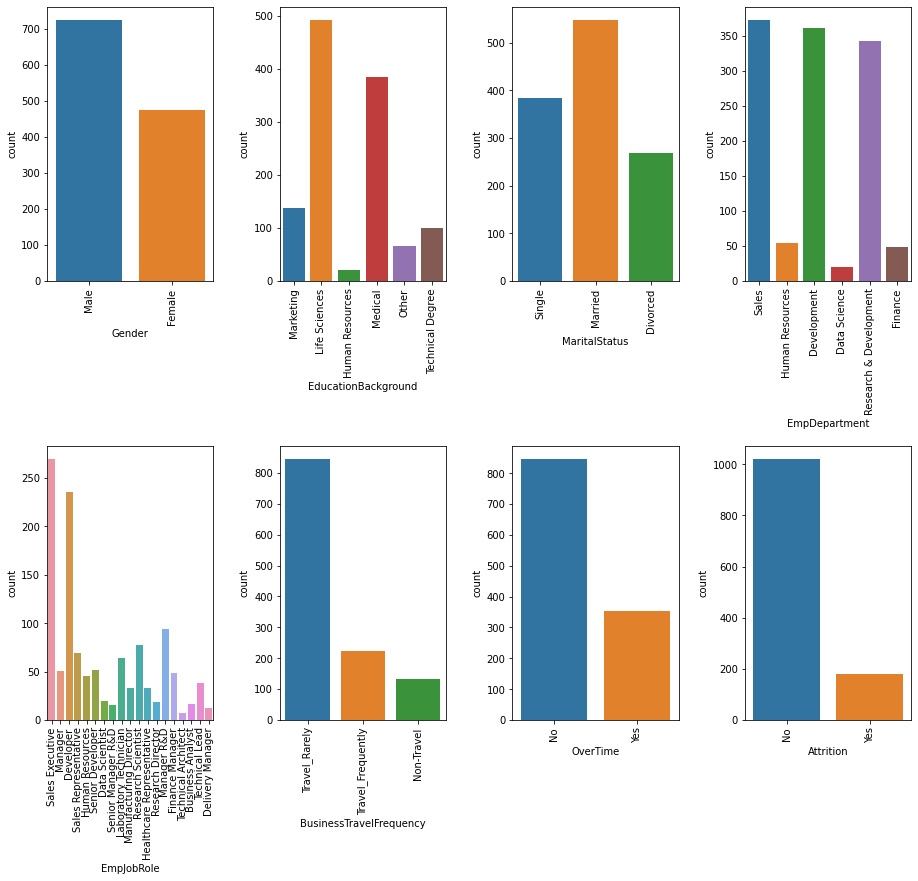

In [ ]:
cat=data.select_dtypes(include="object")
L=[3,4,1]
a,b,c=L
fig=plt.figure(figsize=(15,2))
plt.subplots_adjust(left=0.1,bottom=0.2,right=0.9,top=8.2,wspace=0.4,hspace=0.6)
for x in cat:
  plt.subplot(a,b,c)
  sns.countplot(data[x])
  x=plt.xticks(rotation=90)
  
  c=c+1

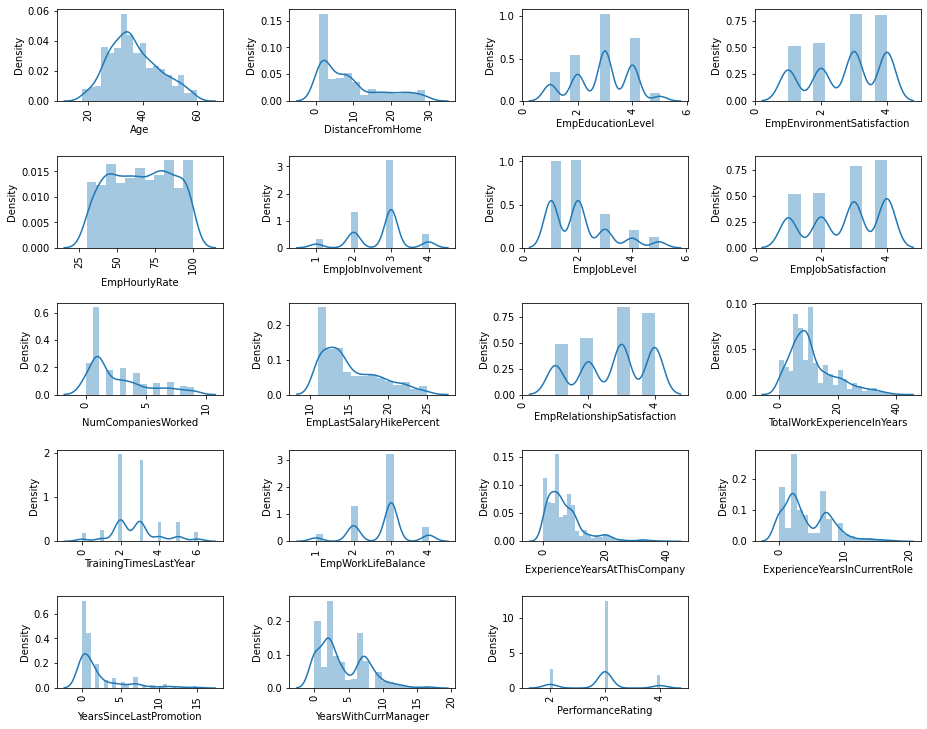

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[20,4,1]
a,b,c=L
fig=plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,bottom=0.2,right=0.9,top=8.2,wspace=0.4,hspace=0.6)
for x in num:
  plt.subplot(a,b,c)
  sns.distplot(data[x])
  x=plt.xticks(rotation=90)

  c=c+1

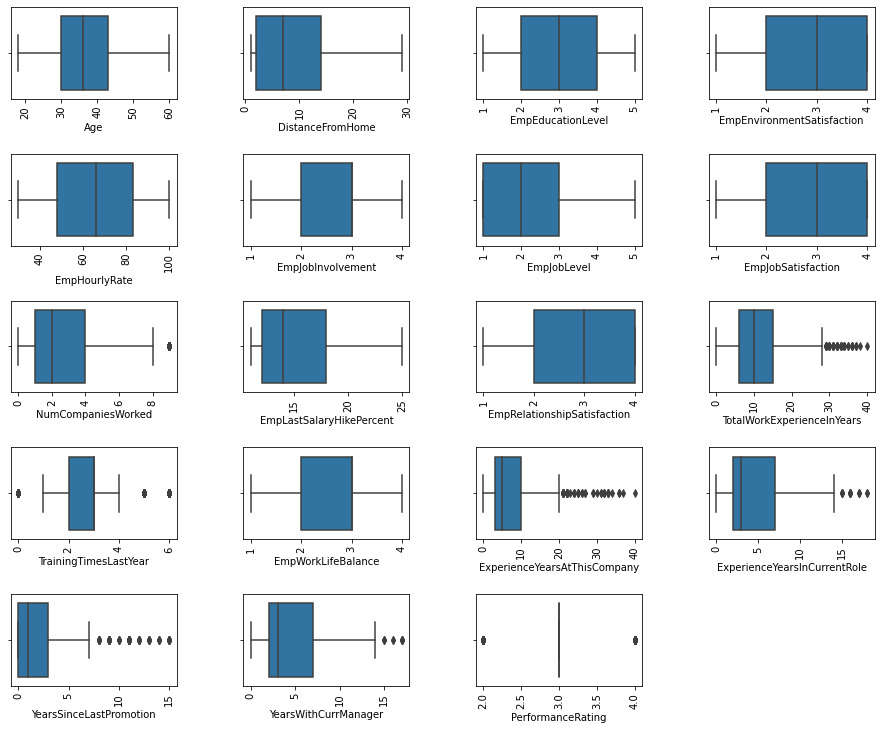

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[20,4,1]
a,b,c=L
fig=plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,bottom=0.2,right=0.9,top=8.2,wspace=0.4,hspace=0.6)
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x])
  x=plt.xticks(rotation=90)



  
  c=c+1